In [78]:
%run header.py data/ASIC-2-FPGA

Python version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.1
matplotlib version: 2.0.2
NumPy version: 1.14.1
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1
-------------------------


In [79]:
df = ML.fix_missing_data(gd.data_v4['adpcm_encoder'].drop(['index'], axis=1)[features])
X = df[valid_features].copy()
y = df.Slices.copy()
display(df.head(2))
display(X.head(2))
display(y.head(2))

,AREA,state,FU,REG,MUX,DEC,pin_pair,net,max,min,ave,MISC,MEM,sim,Pmax,Pmin,Pave,Latency,BlockMemoryBit,DSP,Slices
0,1846,4,977,636,203,0,3246,1505,4,4,4.0,30,0,0,0,0,0,21,0,0,394
1,1574,4,670,636,238,0,2935,1337,4,4,4.0,30,0,0,0,0,0,21,0,0,356


,AREA,state,FU,REG,MUX,DEC,pin_pair,net,max,min,ave,MISC,MEM,sim,Pmax,Pmin,Pave,BlockMemoryBit,DSP
0,1846,4,977,636,203,0,3246,1505,4,4,4.0,30,0,0,0,0,0,0,0
1,1574,4,670,636,238,0,2935,1337,4,4,4.0,30,0,0,0,0,0,0,0


0    394
1    356
Name: Slices, dtype: int64

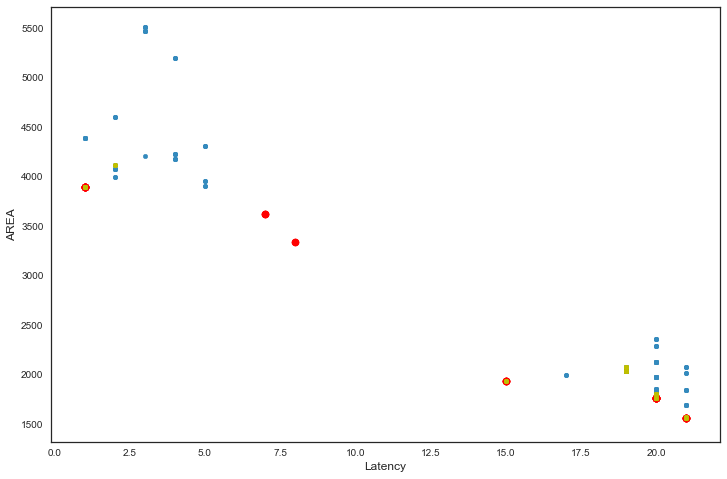

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=1)
df_labeled.plot(kind='scatter', x='Latency', y='AREA', ax=axes)
df_labeled[df_labeled.PF_ASIC].plot(kind='scatter', x='Latency', y='AREA', c='r', s=50, ax=axes)
df_labeled[df_labeled.PF_FPGA].plot(kind='scatter', x='Latency', y='AREA', c='y', ax=axes)
plt.show()

# PCA

<https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html>

In [15]:
pf_fpga = df[['Latency', 'Slices']].as_matrix()
pca = decomposition.PCA(n_components=1)
pca.fit(pf_fpga)
X_pca = pca.transform(pf_fpga)
print('original shape: {}'.format(pf_fpga.shape))
print('trainsformed shape: {}'.format(X_pca.shape))

X_new = pca.inverse_transform(X_pca)

plt.scatter(pf_fpga[:, 0], pf_fpga[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.show()

original shape: (206, 2)
trainsformed shape: (206, 1)


# Orthogonal projection

<https://en.wikibooks.org/wiki/Linear_Algebra/Orthogonal_Projection_Onto_a_Line>

In [99]:
def orthogonal_projection(v, line):
    line_unit = preprocessing.normalize(line)
    cp = np.dot(v, line_unit[1])/np.dot(line_unit[1], line_unit[1])
    v_projected = []
    for i in cp:
        v_projected.append(i * line_unit[1, :])
    v_projected = np.array(v_projected)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(v[:, 0], v[:, 1])
    plt.plot(line[:, 0], line[:, 1])
    plt.plot(line_unit[:, 0], line_unit[:, 1])
    plt.scatter(v_projected[:, 0], v_projected[:, 1])
#     plt.axis('equal')
    plt.show()
    
    return cp

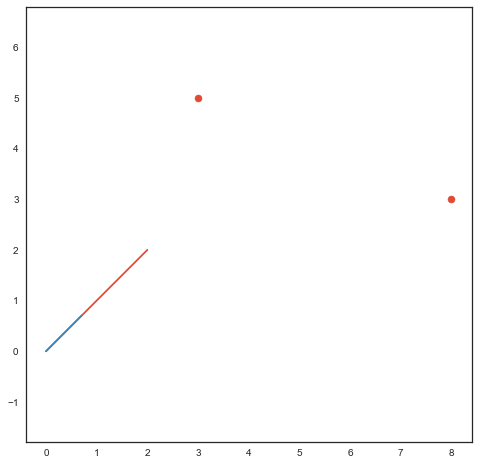

In [97]:
v = np.array([[3, 5], [8, 3]])

line = np.array([[0, 0], [2, 2]])
line_unit = preprocessing.normalize(line)

plt.figure(figsize=(8, 8))
plt.scatter(v[:, 0], v[:, 1])
plt.plot(line[:, 0], line[:, 1])
plt.plot(line_unit[:, 0], line_unit[:, 1])
plt.axis('equal')
plt.show()

In [83]:
line_unit

array([[1.    , 0.    ],
       [0.669 , 0.7433]])

In [73]:
cp = np.dot(v, line_unit[1])/np.dot(line_unit[1], line_unit[1])
v_projected = []
for i in cp:
    v_projected.append(i * line_unit[1, :])
v_projected = np.array(v_projected)

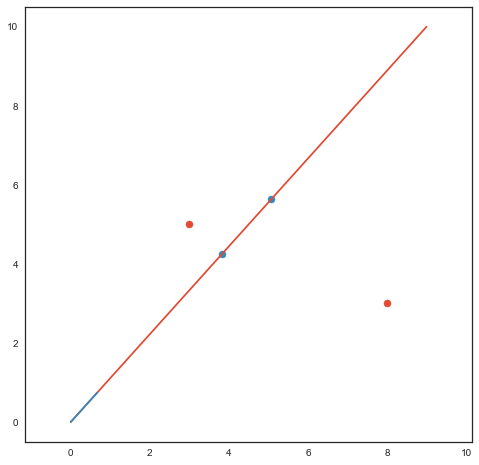

In [76]:
plt.figure(figsize=(8, 8))
plt.scatter(v[:, 0], v[:, 1])
plt.plot(line[:, 0], line[:, 1])
plt.plot(line_unit[:, 0], line_unit[:, 1])
plt.scatter(v_projected[:, 0], v_projected[:, 1])
plt.axis('equal')
plt.show()

In [80]:
dm = DirectMapping()
dm.set_label(df)
df_labeled = dm.df

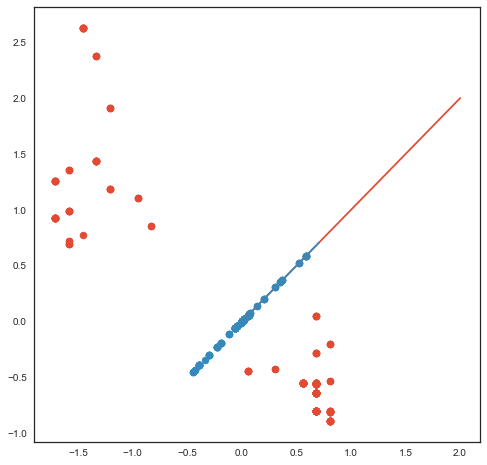

array([ 0.0093, -0.0575,  0.0292,  0.0889,  0.0292,  0.0889,  0.0051,
        0.0023,  0.0959, -0.0833,  0.0292, -0.0833,  0.8293, -0.0833,
        0.0051,  0.2822,  0.0292,  0.2822,  0.0292,  0.5212, -0.0833,
        0.0292,  0.0292, -0.0833,  0.0292, -0.0575, -0.4816,  0.7409,
        0.0051, -0.0575,  0.0051, -0.0833, -0.0833, -0.0833, -0.0833,
       -0.0575, -0.0833,  0.0051, -0.0833,  0.0023, -0.0575,  0.0051,
       -0.0833, -0.0833,  0.0023,  0.0093,  0.0292,  0.0292, -0.0575,
        0.0292,  0.0051,  0.0292, -0.0575, -0.0575, -0.0575,  0.0292,
        0.5212,  0.0051,  0.1938,  0.4328,  0.0292,  0.4328,  0.1938,
        0.0051,  0.0051, -0.0575, -0.0833,  0.0051,  0.0292,  0.0292,
       -0.0833, -0.0575, -0.0135, -0.0575,  0.0292, -0.0833, -0.0833,
        0.4328, -0.0834,  0.1084, -0.0833,  0.0292,  0.0292,  0.0749,
        0.0889, -0.4195, -0.0834,  0.0959,  0.0051, -0.2756,  0.0889,
        0.0959,  0.4996,  0.0959,  0.0051,  0.1084, -0.0135,  0.0889,
       -0.3223, -0.4

In [100]:
v = df_labeled[['Latency', 'Slices']].as_matrix()
orthogonal_projection(v_scaled, line)

In [102]:
estimator = linear_model.LinearRegression(normalize=True)

In [117]:
X = df_labeled[df.PF_FPGA].Latency.reshape(-1, 1)
y = df_labeled[df.PF_FPGA].Slices.reshape(-1, 1)

C:\Users\sxl131830\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\sxl131830\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [118]:
X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y)

C:\Users\sxl131830\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [121]:
estimator.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [131]:
estimator.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [122]:
estimator.coef_

array([[-34.9936]])

In [132]:
line_scope = -1 / estimator.coef_[0][0]

In [133]:
line = np.array([[0, 0], [2, 2 * line_scope]])

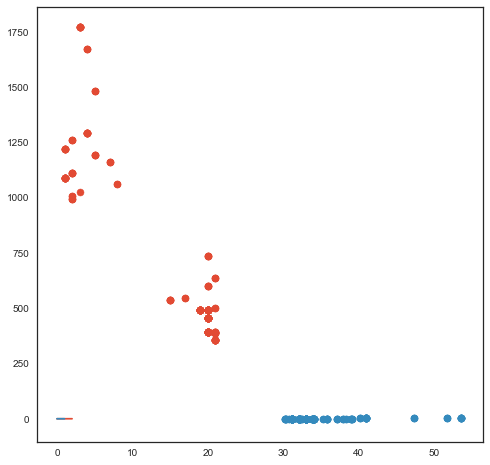

array([32.2461, 31.1606, 33.0175, 33.9887, 33.0175, 33.9887, 33.0748,
       32.1318, 34.103 , 31.1893, 33.0175, 31.1893, 53.6446, 31.1893,
       33.0748, 37.1309, 33.0175, 37.1309, 33.0175, 41.0157, 31.1893,
       33.0175, 33.0175, 31.1893, 33.0175, 31.1606, 32.3351, 51.7591,
       33.0748, 31.1606, 33.0748, 31.1893, 31.1893, 31.1893, 31.1893,
       31.1606, 31.1893, 33.0748, 31.1893, 32.1318, 31.1606, 33.0748,
       31.1893, 31.1893, 32.1318, 32.2461, 33.0175, 33.0175, 31.1606,
       33.0175, 33.0748, 33.0175, 31.1606, 31.1606, 31.1606, 33.0175,
       41.0157, 33.0748, 35.2454, 39.1302, 33.0175, 39.1302, 35.2454,
       33.0748, 33.0748, 31.1606, 31.1893, 33.0748, 33.0175, 33.0175,
       31.1893, 31.1606, 39.0475, 31.1606, 33.0175, 31.1893, 31.1893,
       39.1302, 32.5324, 40.1326, 31.1893, 33.0175, 33.0175, 40.9329,
       33.9887, 33.7921, 32.5324, 34.103 , 33.0748, 30.3047, 33.9887,
       34.103 , 47.3885, 34.103 , 33.0748, 40.1326, 39.0475, 33.9887,
       35.8204, 33.7

In [130]:
v = df_labeled[['Latency', 'Slices']].as_matrix()
orthogonal_projection(v, line)

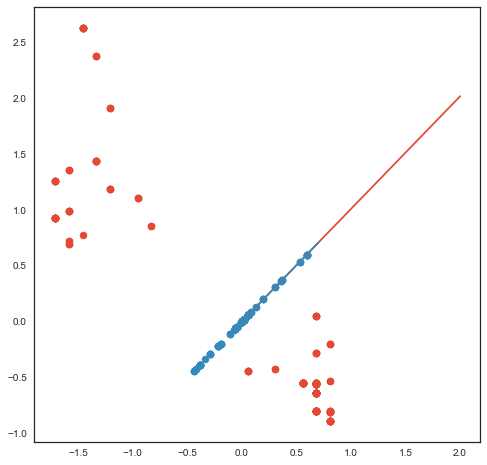

array([ 0.0046, -0.0625,  0.0253,  0.0853,  0.0253,  0.0853,  0.0019,
       -0.0025,  0.0923, -0.0877,  0.0253, -0.0877,  0.8413, -0.0877,
        0.0019,  0.2794,  0.0253,  0.2794,  0.0253,  0.5193, -0.0877,
        0.0253,  0.0253, -0.0877,  0.0253, -0.0625, -0.475 ,  0.7518,
        0.0019, -0.0625,  0.0019, -0.0877, -0.0877, -0.0877, -0.0877,
       -0.0625, -0.0877,  0.0019, -0.0877, -0.0025, -0.0625,  0.0019,
       -0.0877, -0.0877, -0.0025,  0.0046,  0.0253,  0.0253, -0.0625,
        0.0253,  0.0019,  0.0253, -0.0625, -0.0625, -0.0625,  0.0253,
        0.5193,  0.0019,  0.1898,  0.4298,  0.0253,  0.4298,  0.1898,
        0.0019,  0.0019, -0.0625, -0.0877,  0.0019,  0.0253,  0.0253,
       -0.0877, -0.0625, -0.0065, -0.0625,  0.0253, -0.0877, -0.0877,
        0.4298, -0.0855,  0.1145, -0.0877,  0.0253,  0.0253,  0.0831,
        0.0853, -0.4119, -0.0855,  0.0923,  0.0019, -0.277 ,  0.0853,
        0.0923,  0.5088,  0.0923,  0.0019,  0.1145, -0.0065,  0.0853,
       -0.3136, -0.4

In [134]:
v = df_labeled[['Latency', 'Slices']].as_matrix()
orthogonal_projection(v_scaled, line)